In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
data=pd.read_csv(r'C:\Users\rqsar\Downloads\hiring (1).csv')

In [3]:
data

,experience,test_score(outof10),interview_score(outof10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,600009
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
data.isnull().sum()

experience                  2
test_score(outof10)         1
interview_score(outof10)    0
salary($)                   0
dtype: int64

In [5]:
# We have missing values in the first and second columns. 
# The first column has an inherent ordering and we need to do ordinal encoding to treat the string values of the column 
# and convert to numerical.
# For computing missing values, we can use mode for the first column and mean or median for the second column depending on 
# whether we have outliers or not, for which we can check the presence of outliers or not by doing a box plot.

<Axes: xlabel='test_score(outof10)'>

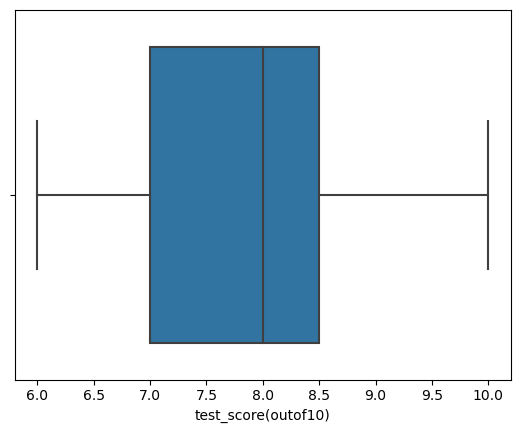

In [6]:
sns.boxplot(x='test_score(outof10)', data=data)

In [7]:
# There are no outliers in the column test_score so we will be filling missing values by mean instead of median.

In [8]:
testscore_mean=data['test_score(outof10)'].mean()

In [9]:
testscore_mean

7.857142857142857

In [10]:
data['test_score(outof10)'].fillna(testscore_mean, inplace=True)

In [11]:
data


,experience,test_score(outof10),interview_score(outof10),salary($)
0,NaN,8.000000,9,50000
1,NaN,8.000000,6,45000
2,five,6.000000,7,600009
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [12]:
# calculate Mode for experience column
experience_mode=data['experience'].mode()[0]

In [13]:
experience_mode

'eleven'

In [14]:
# Replace the missing values with calculated mode
data['experience'].fillna (experience_mode, inplace = True)

In [15]:
data

,experience,test_score(outof10),interview_score(outof10),salary($)
0,eleven,8.000000,9,50000
1,eleven,8.000000,6,45000
2,five,6.000000,7,600009
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [16]:
data.isnull().sum()

experience                  0
test_score(outof10)         0
interview_score(outof10)    0
salary($)                   0
dtype: int64

In [17]:
# Ordinal Encoding 
# Trying to convert the categorical values of the experience column to numeric by preserving the order of the data.


In [18]:
data.experience.value_counts()

eleven    3
five      1
two       1
seven     1
three     1
ten       1
Name: experience, dtype: int64

In [19]:
# Mapping the data from original column and converting to integers

mapping={'two':2, 'three':3, 'five':5, 'seven':7, 'ten':10, 'eleven':11}
data['encoded_experience']= data['experience'].map(mapping)

In [20]:
data

,experience,test_score(outof10),interview_score(outof10),salary($),encoded_experience
0,eleven,8.000000,9,50000,11
1,eleven,8.000000,6,45000,11
2,five,6.000000,7,600009,5
3,two,10.000000,10,65000,2
4,seven,9.000000,6,70000,7
5,three,7.000000,10,62000,3
6,ten,7.857143,7,72000,10
7,eleven,7.000000,8,80000,11


In [21]:
data1=data.drop('experience', axis=1, inplace = True)
# axis =1 is for deletion from column
# inplace = True is for permanent deletion

In [22]:
data

,test_score(outof10),interview_score(outof10),salary($),encoded_experience
0,8.000000,9,50000,11
1,8.000000,6,45000,11
2,6.000000,7,600009,5
3,10.000000,10,65000,2
4,9.000000,6,70000,7
5,7.000000,10,62000,3
6,7.857143,7,72000,10
7,7.000000,8,80000,11


In [23]:
# We are now building the multiple linear regression model because the target variable 'Salary' is continuous.
# So we divide the dat set into two parts x and y 
# where x=data[['test_score(outof10)','interview_score(outof10)','encoded_experience']]
# the independent columns (features) of the data set. 
# And y=data['salary($)'], the dependent variable of the data set.
# After that we will do the train test split to build the model on the trained data and evaluate the model on the test data.

In [24]:
x=data[['test_score(outof10)','interview_score(outof10)','encoded_experience']]
x

,test_score(outof10),interview_score(outof10),encoded_experience
0,8.000000,9,11
1,8.000000,6,11
2,6.000000,7,5
3,10.000000,10,2
4,9.000000,6,7
5,7.000000,10,3
6,7.857143,7,10
7,7.000000,8,11


In [25]:
y=data['salary($)']
y

0     50000
1     45000
2    600009
3     65000
4     70000
5     62000
6     72000
7     80000
Name: salary($), dtype: int64

In [26]:
# We are splitting x and y into train and test data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [27]:
x_train

,test_score(outof10),interview_score(outof10),encoded_experience
1,8.0,6,11
7,7.0,8,11
3,10.0,10,2
0,8.0,9,11
5,7.0,10,3
4,9.0,6,7


In [28]:
x_test

,test_score(outof10),interview_score(outof10),encoded_experience
6,7.857143,7,10
2,6.000000,7,5


In [29]:
y_train

1    45000
7    80000
3    65000
0    50000
5    62000
4    70000
Name: salary($), dtype: int64

In [30]:
y_test

6     72000
2    600009
Name: salary($), dtype: int64

In [31]:
#Now we build the multiple linear reg model

reg=linear_model.LinearRegression()
#saving the instance

In [32]:
reg.fit(x_train, y_train)
# we are building the model on the trained data

LinearRegression()

In [33]:
#To getb the b value ( the intercept)
reg.intercept_

98757.45242940274

In [34]:
# To get the coefficient value 
reg.coef_

array([-2464.63889186,  -926.60026418, -1208.31102067])

In [35]:
data

,test_score(outof10),interview_score(outof10),salary($),encoded_experience
0,8.000000,9,50000,11
1,8.000000,6,45000,11
2,6.000000,7,600009,5
3,10.000000,10,65000,2
4,9.000000,6,70000,7
5,7.000000,10,62000,3
6,7.857143,7,72000,10
7,7.000000,8,80000,11


In [36]:
#mention key value pairs because the feature columns are not in sequence in the data set.

In [37]:
input_data = pd.DataFrame({'test_score(outof10)': [10],'interview_score(outof10)': [8], 'encoded_experience': [14]})

In [38]:
reg.predict(input_data)

array([49781.90710792])

In [39]:
# validating our output manually for equation y=b+ (m1x1+m2x2+m3x3)
(-2464.63889186*10) + (-926.60026418*8) + (-1208.31102067*14) + 98757.45242940274

49781.90710798273